In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import nltk 
import string
string.punctuation
print('Finsihed loading libraries')

Finsihed loading libraries


In [2]:

fileName='Full-Economic-News-DFE-839861.txt'
metaDf=pd.read_csv(fileName, encoding= 'unicode_escape')

#check columns
print('\nData columns:')
print(metaDf.columns)

#data head
print('\nmeta data:')
print(metaDf)


Data columns:
Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'positivity', 'positivity:confidence', 'relevance',
       'relevance:confidence', 'articleid', 'date', 'headline',
       'positivity_gold', 'relevance_gold', 'text'],
      dtype='object')

meta data:
       _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0     842613455    False   finalized                   3     12/5/15 17:48   
1     842613456    False   finalized                   3     12/5/15 16:54   
2     842613457    False   finalized                   3      12/5/15 1:59   
3     842613458    False   finalized                   3      12/5/15 2:19   
4     842613459    False   finalized                   3     12/5/15 17:48   
...         ...      ...         ...                 ...               ...   
7995  830985632    False   finalized                   3    11/17/15 18:16   
7996  830985633    False   finalized                   3     11

In [3]:
data = pd.read_csv("Full-Economic-News-DFE-839861.txt" , encoding = "ISO-8859-1" )
data.shape
data = data[data.relevance != "not sure"] 
data.shape
data['relevance'] = data.relevance.map({'yes':1, 'no':0}) 
data = data[["text","relevance"]] 
print(data.shape)
print(data.head())

(7991, 2)
                                                text  relevance
0  NEW YORK -- Yields on most certificates of dep...          1
1  The Wall Street Journal Online</br></br>The Mo...          0
2  WASHINGTON -- In an effort to achieve banking ...          0
3  The statistics on the enormous costs of employ...          0
4  NEW YORK -- Indecision marked the dollar's ton...          1


In [4]:
from sklearn.feature_extraction import _stop_words
stopwords = _stop_words.ENGLISH_STOP_WORDS
def clean(doc): # doc is a string of text
    doc = doc.replace("</br>", " ") # This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # remove punctuation and numbers
    return doc

# Count Vectorizer

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
x = data.text # the column text contains textual data to extract features from
y = data.relevance # this is the column we are learning to predict. 
print(x.shape, y.shape)

(7991,) (7991,)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6392,)
(6392,)
(1599,)
(1599,)


In [8]:
vect = CountVectorizer(preprocessor=clean) # instantiate a vectoriezer
x_train_dtm = vect.fit_transform(x_train)# use it to extract features from training data
# transform testing data (using training data's features)
x_test_dtm = vect.transform(x_test)
print(x_train_dtm.shape, x_test_dtm.shape)

(6392, 51416) (1599, 51416)


In [9]:
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
nb.fit(x_train_dtm, y_train) # train the model(timing it with an IPython "magic command

MultinomialNB()

In [10]:
 y_pred_class = nb.predict(x_test_dtm)

In [11]:
from sklearn.metrics import accuracy_score
#check the accuracy
# Print accuracy:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))

Accuracy:  0.7779862414008756


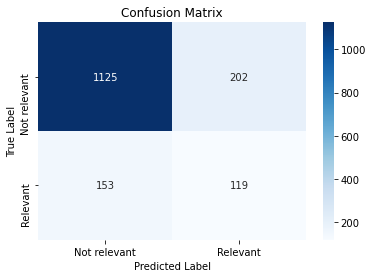

In [12]:
# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
class_label = ["Not relevant", "Relevant"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# TF-IDF

In [13]:
import string
import re
import nltk
stopword = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [14]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text
# Function to remove Stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text
def clean_text(text):
    text = text.replace("</br>", " ")
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [31]:
a = data.text 
b = data.relevance 
print(a.shape, b.shape)

(7991,) (7991,)


In [32]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2,random_state=1)
print(a_train.shape)
print(b_train.shape)
print(a_test.shape)
print(b_test.shape)

(6392,)
(6392,)
(1599,)
(1599,)


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(analyzer=clean_text)

In [33]:
a_train_tf = tf_vectorizer.fit_transform(a_train)
a_test_tf = tf_vectorizer.transform(a_test)
print(a_train_tf.shape, a_test_tf.shape)

(6392, 40513) (1599, 40513)


In [35]:
nb = MultinomialNB() 
nb.fit(a_train_tf, b_train) 
b_pred_class = nb.predict(a_test_tf)

In [36]:
print("Accuracy: ", accuracy_score(b_test, b_pred_class))

Accuracy:  0.8298936835522202


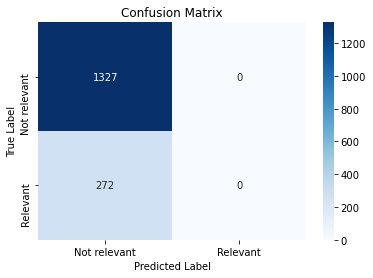

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(b_test, b_pred_class)
class_label = ["Not relevant", "Relevant"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()